In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance
import math
%matplotlib inline

In [4]:
data = pd.read_csv("uber.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [5]:
data.drop(['Unnamed: 0','key'], axis=1, inplace=True)

data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


# **Check if Null values are present**

In [6]:
data.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,1


In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26781 entries, 0 to 26780
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        26781 non-null  float64
 1   pickup_datetime    26781 non-null  object 
 2   pickup_longitude   26781 non-null  float64
 3   pickup_latitude    26781 non-null  float64
 4   dropoff_longitude  26781 non-null  float64
 5   dropoff_latitude   26781 non-null  float64
 6   passenger_count    26781 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.6+ MB


# **Reframing Columns**

In [12]:
data = data[(data.pickup_latitude<90) & (data.dropoff_latitude<90) &
        (data.pickup_latitude>-90) & (data.dropoff_latitude>-90) &
        (data.pickup_longitude<180) & (data.dropoff_longitude<180) &
        (data.pickup_longitude>-180) & (data.dropoff_longitude>-180)]

data.pickup_datetime=pd.to_datetime(data.pickup_datetime)

data['year'] = data.pickup_datetime.dt.year
data['month'] = data.pickup_datetime.dt.month
data['weekday'] = data.pickup_datetime.dt.weekday
data['hour'] = data.pickup_datetime.dt.hour

data['Monthly_Quarter'] = data.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
                                      8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})
data['Hourly_Segments'] = data.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',
                                     9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',
                                     17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'})

data['Distance']=[round(geopy.distance.distance((data.pickup_latitude[i], data.pickup_longitude[i]),(data.dropoff_latitude[i], data.dropoff_longitude[i])).m,2) for i in data.index]

data.drop(['pickup_datetime','month', 'hour',], axis=1, inplace=True)

original_df = data.copy(deep=True)

data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,3,Q2,H5,1681.11
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,4,Q3,H6,2454.36
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,0,Q3,H6,5039.60
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,4,Q2,H3,1661.44
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,2014,3,Q3,H5,4483.73


In [13]:
data.nunique().sort_values()

,0
Monthly_Quarter,4
Hourly_Segments,6
year,7
weekday,7
passenger_count,7
fare_amount,563
pickup_longitude,21174
dropoff_longitude,21666
pickup_latitude,22232
dropoff_latitude,22551


In [15]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Distance
count,26780.000000,26780.000000,26780.000000,26780.000000,26780.000000,26780.000000,26780.000000,26780.000000,2.678000e+04
mean,11.409366,-72.536946,39.940887,-72.552543,39.942636,1.674720,2011.751307,3.055078,1.907257e+04
std,10.134358,10.332664,6.066164,10.275022,6.061219,1.294776,1.862338,1.939637,3.618669e+05
min,0.000000,-75.426904,-74.015515,-75.350437,-74.008745,0.000000,2009.000000,0.000000,0.000000e+00
25%,6.000000,-73.992068,40.734923,-73.991517,40.733798,1.000000,2010.000000,1.000000,1.213565e+03
50%,8.500000,-73.981849,40.752453,-73.980202,40.752927,1.000000,2012.000000,3.000000,2.124150e+03
75%,12.900000,-73.967329,40.767127,-73.963435,40.768173,2.000000,2013.000000,5.000000,3.902030e+03
max,350.000000,40.770667,45.031653,40.828377,45.031598,6.000000,2015.000000,6.000000,8.675129e+06


# **Exploratory Data Analysis**

/tmp/ipython-input-1000603492.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['fare_amount'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


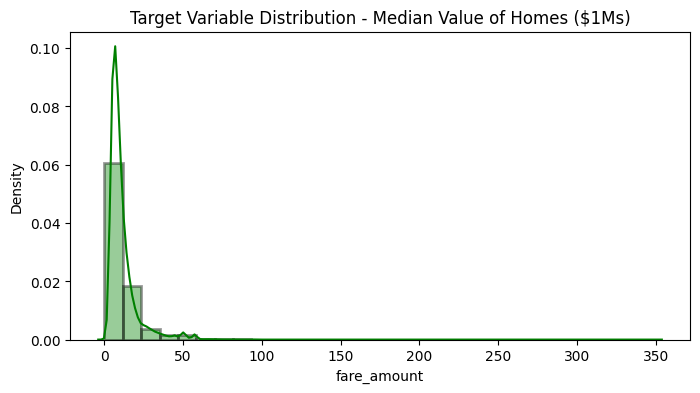

In [18]:
plt.figure(figsize=[8,4])
sns.distplot(data['fare_amount'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

In [24]:
#numerical & categorical features

nu = data.drop(['fare_amount'], axis=1).nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0;

for i in range(data.drop(['fare_amount'], axis=1).shape[1]):
    if nu.values[i]<=24:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 5 numerical & 5 categorical features.


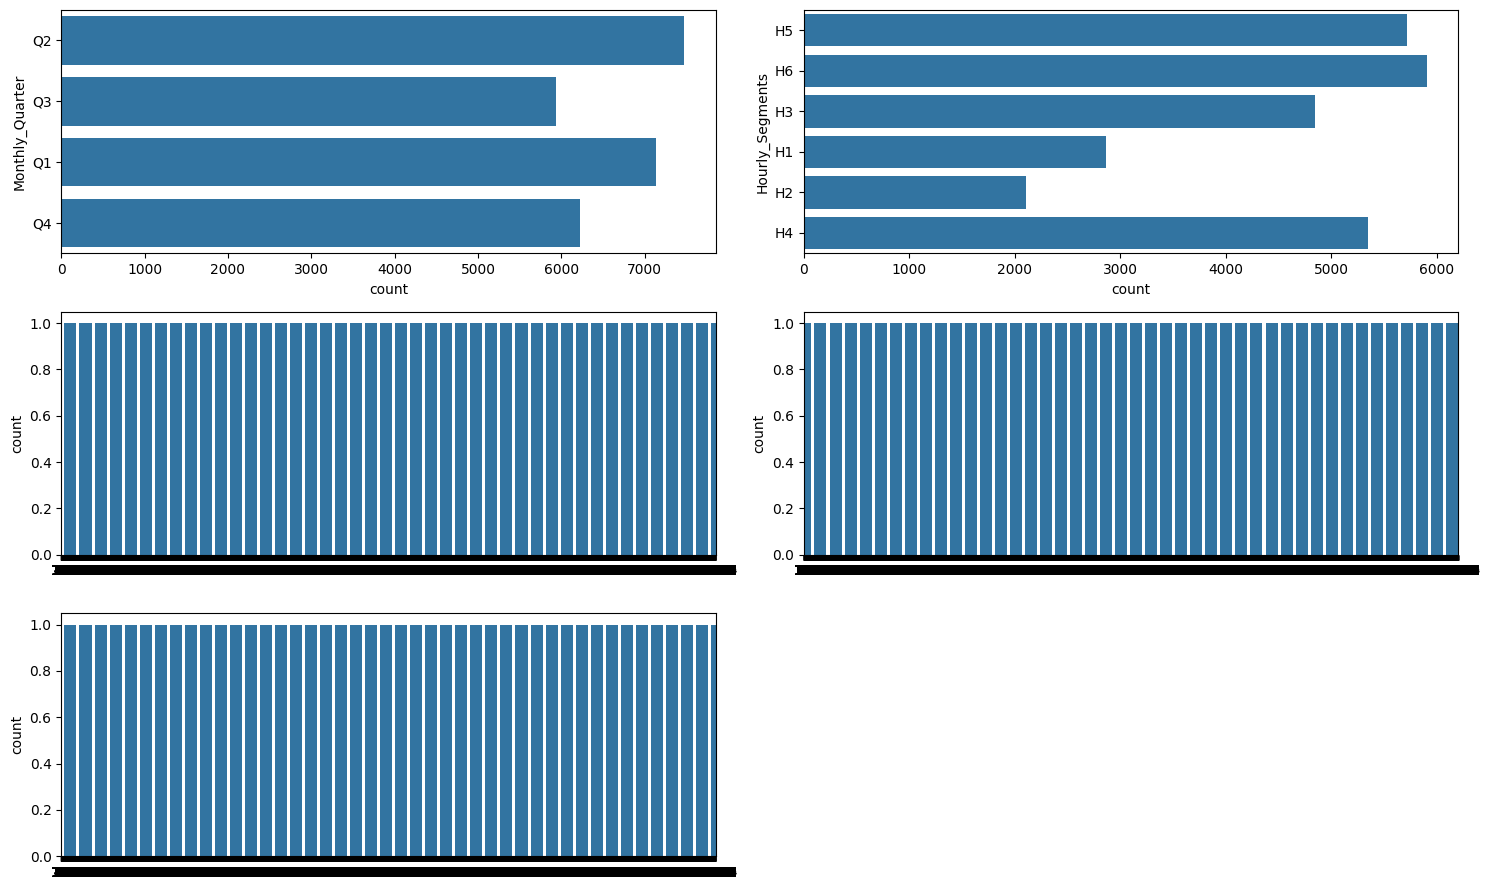

In [27]:
n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if data[cf[i]].nunique()<=12:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(data[cf[i]])
    else:
        plt.subplot(3,1,i-3)
        sns.countplot(data[cf[i]])

plt.tight_layout()
plt.show()